In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

In [2]:
# 1.а) Загрузка датасета
# Указываем разделитель sep=';' и десятичный знак decimal=','
df = pd.read_csv('diamonds.csv', sep=';', decimal=',')

In [3]:
print("Первые 5 строк данных:")
print(df.head())

print("\nОбщая информация о данных (типы, пропуски):")
df.info()

print("\nОсновные статистические характеристики числовых и категориальных признаков:")
# Для числовых
print(df.describe())
# Для категориальных
print(df.describe(include=['object']))

Первые 5 строк данных:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Общая информация о данных (типы, пропуски):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        539

In [4]:
# 1.б) Проверка пропущенных значений
print("\nПроверка пропущенных значений (по столбцам):")
print(df.isnull().sum())


Проверка пропущенных значений (по столбцам):
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [5]:
# Шаг 1: Подсчет аномальных записей
anomalous_mask = (df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)
anomalous_count = df[anomalous_mask].shape[0]

print(f"\nКоличество записей с нулевыми размерами (x=0 или y=0 или z=0): {anomalous_count}")


Количество записей с нулевыми размерами (x=0 или y=0 или z=0): 20


In [6]:
# Шаг 2: Удаление аномальных записей с использованием .copy()
# Используем тильду (~) для инвертирования маски (выбираем НЕ аномальные)
df_cleaned = df[~anomalous_mask].copy()

# Обновляем рабочую копию
df = df_cleaned

print(f"\nРазмер датасета после удаления аномалий: {df.shape}")


Размер датасета после удаления аномалий: (53920, 10)


In [7]:
# Перепроверяем минимальные значения в x, y, z
print("\nСтатистика для проверки минимальных значений x, y, z после очистки:")
print(df[['x', 'y', 'z']].describe().loc['min'])


Статистика для проверки минимальных значений x, y, z после очистки:
x    3.73
y    3.68
z    1.07
Name: min, dtype: float64


In [8]:
# 1.г) Проверка и обработка дубликатов
duplicate_count = df.duplicated().sum()

print(f"\nКоличество полных дубликатов записей: {duplicate_count}")


Количество полных дубликатов записей: 145


In [9]:
# Если дубликаты есть, удаляем их
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"Дубликаты удалены. Новый размер датасета: {df.shape}")
else:
    print("Дубликатов не найдено.")

Дубликаты удалены. Новый размер датасета: (53775, 10)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

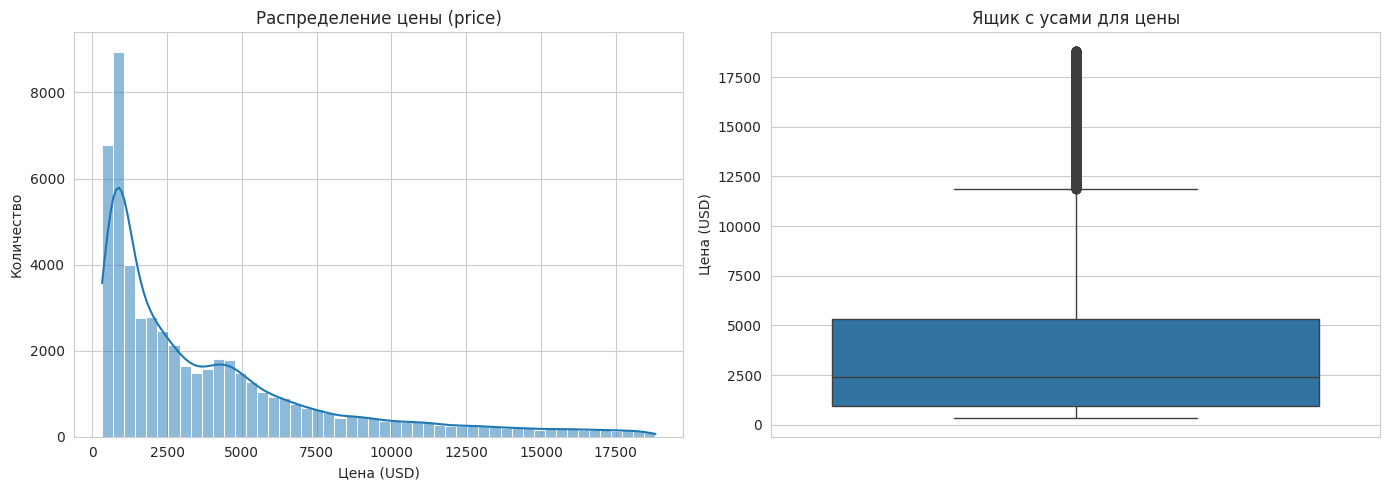


Статистика распределения цены:
Скошенность (Skewness): 1.62
Эксцесс (Kurtosis): 2.18


In [11]:
# Устанавливаем стиль для графиков
sns.set_style("whitegrid")

# 2.а) Анализ распределения цены (price)
plt.figure(figsize=(14, 5))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Распределение цены (price)')
plt.xlabel('Цена (USD)')
plt.ylabel('Количество')

# Ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Ящик с усами для цены')
plt.ylabel('Цена (USD)')

plt.tight_layout()
plt.show()

# Статистика скошенности и эксцесса
print("\nСтатистика распределения цены:")
print(f"Скошенность (Skewness): {df['price'].skew():.2f}")
print(f"Эксцесс (Kurtosis): {df['price'].kurtosis():.2f}")

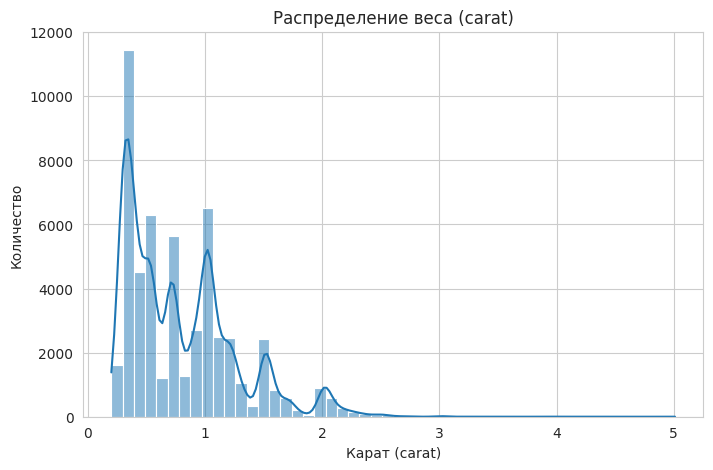


Статистика распределения каратов:
Скошенность (Skewness): 1.11
Эксцесс (Kurtosis): 1.25


In [12]:
# 2.б) Анализ распределения числового признака 'carat'
plt.figure(figsize=(8, 5))
sns.histplot(df['carat'], bins=50, kde=True)
plt.title('Распределение веса (carat)')
plt.xlabel('Карат (carat)')
plt.ylabel('Количество')
plt.show()

print("\nСтатистика распределения каратов:")
print(f"Скошенность (Skewness): {df['carat'].skew():.2f}")
print(f"Эксцесс (Kurtosis): {df['carat'].kurtosis():.2f}")

Скошенность depth: -0.11
Скошенность table: 0.79
Скошенность x: 0.40
Скошенность y: 2.47
Скошенность z: 1.59


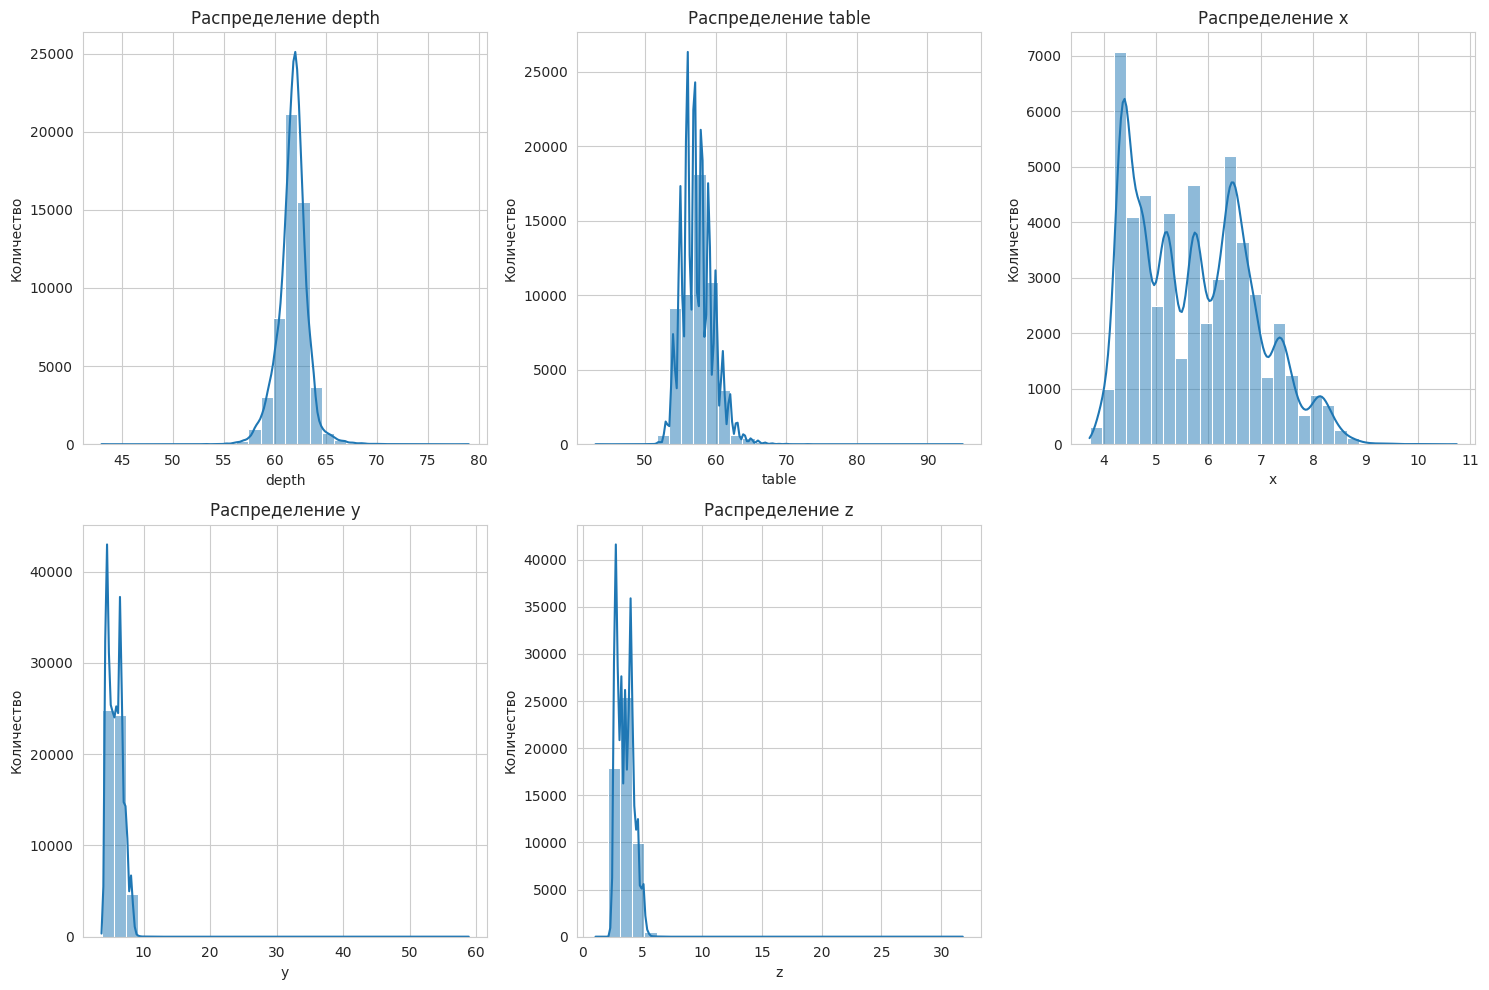

In [13]:
# Выбираем остальные числовые признаки
numeric_cols = ['depth', 'table', 'x', 'y', 'z']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    print(f"Скошенность {col}: {df[col].skew():.2f}")

plt.tight_layout()
plt.show()

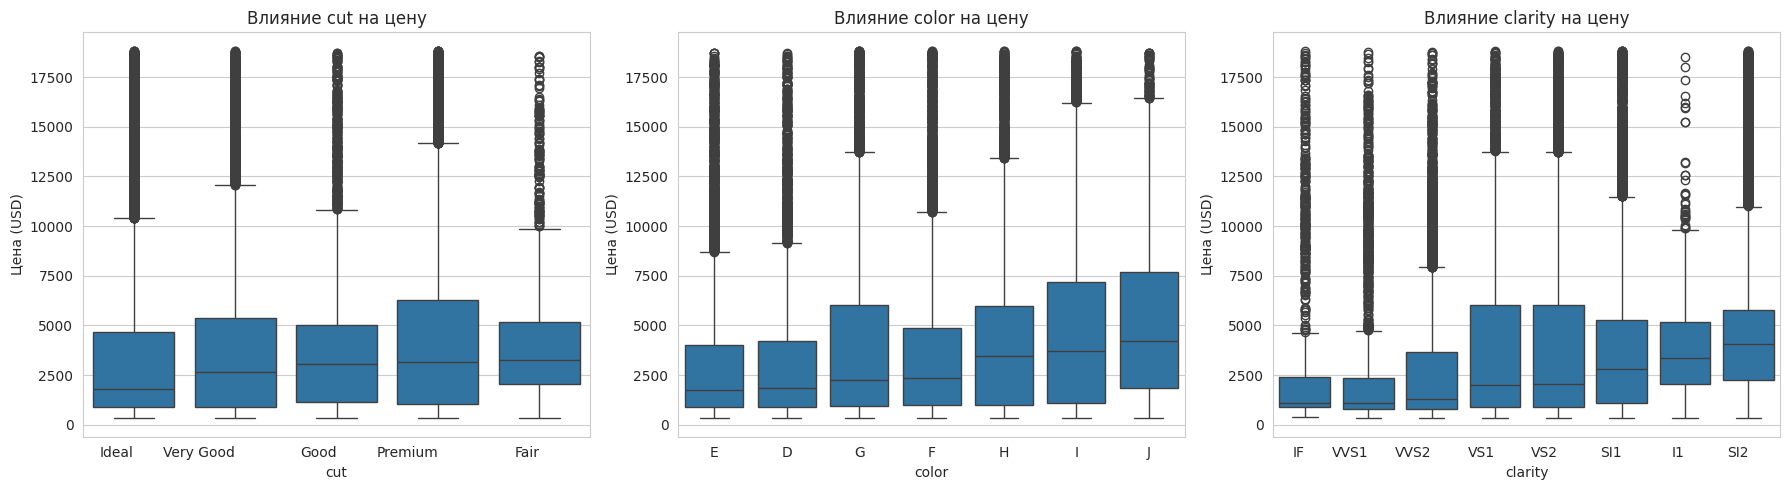

In [14]:
# 2.в) Анализ категориальных признаков
categorical_cols = ['cut', 'color', 'clarity']

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    # Используем boxplot для сравнения распределения цены по категориям
    sns.boxplot(x=col, y='price', data=df, order=df.groupby(col)['price'].median().sort_values().index)
    plt.title(f'Влияние {col} на цену')
    plt.xlabel(col)
    plt.ylabel('Цена (USD)')
    # Вращаем подписи для лучшей читаемости
    if i == 0 or i == 2:
        plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()


Матрица корреляции Пирсона:
          carat     depth     table     price         x         y         z
carat  1.000000  0.027889  0.181113  0.921548  0.977857  0.953980  0.961030
depth  0.027889  1.000000 -0.297580 -0.011144 -0.025224 -0.029262  0.094678
table  0.181113 -0.297580  1.000000  0.126666  0.195451  0.183814  0.151683
price  0.921548 -0.011144  0.126666  1.000000  0.887137  0.867685  0.868030
x      0.977857 -0.025224  0.195451  0.887137  1.000000  0.974822  0.975382
y      0.953980 -0.029262  0.183814  0.867685  0.974822  1.000000  0.956623
z      0.961030  0.094678  0.151683  0.868030  0.975382  0.956623  1.000000


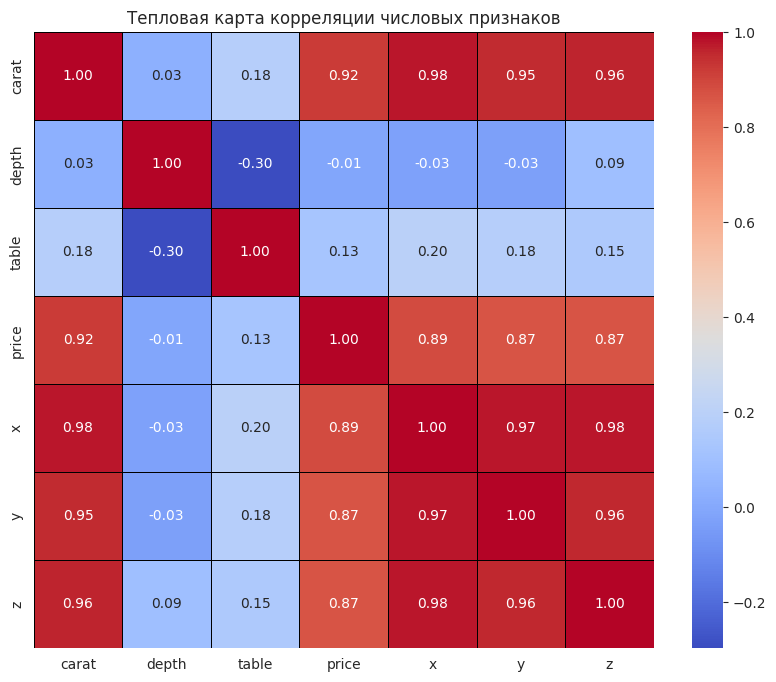

In [15]:
# 2.г) Анализ корреляции
# Рассчитываем корреляцию для всех числовых столбцов
correlation_matrix = df.corr(numeric_only=True)

print("\nМатрица корреляции Пирсона:")
print(correlation_matrix)

# Визуализация корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,        # Показать числовые значения
            fmt=".2f",
            cmap='coolwarm',
            cbar=True,
            linewidths=0.5,
            linecolor='black')
plt.title('Тепловая карта корреляции числовых признаков')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
# Отделение признаков (X) и целевой переменной (y)
X = df.drop('price', axis=1)
y = df['price']

# Разделение данных: 80% на обучение, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test): {X_test.shape}")

Размер обучающей выборки (X_train): (43020, 9)
Размер тестовой выборки (X_test): (10755, 9)


In [18]:
# --- 3.а) Создание новых признаков ---

# 1. Объем бриллианта (x * y * z)
X_train['volume'] = X_train['x'] * X_train['y'] * X_train['z']
X_test['volume'] = X_test['x'] * X_test['y'] * X_test['z']

# 2. Плотность (carat / volume)
X_train['density'] = X_train['carat'] / X_train['volume']
X_test['density'] = X_test['carat'] / X_test['volume']

# 3. Пропорции (x/y, x/z)
X_train['ratio_x_y'] = X_train['x'] / X_train['y']
X_train['ratio_x_z'] = X_train['x'] / X_train['z']

X_test['ratio_x_y'] = X_test['x'] / X_test['y']
X_test['ratio_x_z'] = X_test['x'] / X_test['z']

print("\nПервые 5 строк X_train с новыми признаками:")
print(X_train[['volume', 'density', 'ratio_x_y', 'ratio_x_z']].head())


Первые 5 строк X_train с новыми признаками:
           volume   density  ratio_x_y  ratio_x_z
42144   90.604475  0.006070   0.996219   1.621538
10763  161.693532  0.006246   1.006279   1.618687
23057  244.118304  0.006145   0.993280   1.664414
11127  146.987592  0.006123   1.008157   1.592784
35702   49.436352  0.006068   1.011710   1.611940


In [19]:
# 3.б) Кодирование категориальных переменных

# 1. Порядковое кодирование (Ordinal Encoding)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Создаем словари для маппинга
cut_map = {cat: i for i, cat in enumerate(cut_order)}
color_map = {cat: i for i, cat in enumerate(color_order)}
clarity_map = {cat: i for i, cat in enumerate(clarity_order)}

# Применяем кодирование
X_train['cut_encoded'] = X_train['cut'].map(cut_map)
X_train['color_encoded'] = X_train['color'].map(color_map)
X_train['clarity_encoded'] = X_train['clarity'].map(clarity_map)

X_test['cut_encoded'] = X_test['cut'].map(cut_map)
X_test['color_encoded'] = X_test['color'].map(color_map)
X_test['clarity_encoded'] = X_test['clarity'].map(clarity_map)

# 2. Создание бинарных признаков
X_train['cut_ideal'] = (X_train['cut'] == 'Ideal').astype(int)
X_test['cut_ideal'] = (X_test['cut'] == 'Ideal').astype(int)

X_train['color_D'] = (X_train['color'] == 'D').astype(int)
X_test['color_D'] = (X_test['color'] == 'D').astype(int)

X_train['clarity_IF'] = (X_train['clarity'] == 'IF').astype(int)
X_test['clarity_IF'] = (X_test['clarity'] == 'IF').astype(int)

# 3. Удаление исходных категориальных столбцов
X_train = X_train.drop(['cut', 'color', 'clarity'], axis=1)
X_test = X_test.drop(['cut', 'color', 'clarity'], axis=1)

print("\nКоличество столбцов в X_train после инженерии признаков:", X_train.shape[1])
print("Первые 5 строк X_train после кодирования:")
print(X_train.head())


Количество столбцов в X_train после инженерии признаков: 16
Первые 5 строк X_train после кодирования:
       carat  depth  table     x     y     z      volume   density  ratio_x_y  \
42144   0.55   61.6   55.0  5.27  5.29  3.25   90.604475  0.006070   0.996219   
10763   1.01   62.0   58.0  6.41  6.37  3.96  161.693532  0.006246   1.006279   
23057   1.50   59.9   60.0  7.39  7.44  4.44  244.118304  0.006145   0.993280   
11127   0.90   63.0   55.0  6.18  6.13  3.88  146.987592  0.006123   1.008157   
35702   0.30   62.4   56.0  4.32  4.27  2.68   49.436352  0.006068   1.011710   

       ratio_x_z  cut_encoded  color_encoded  clarity_encoded  cut_ideal  \
42144   1.621538            4              1                3          1   
10763   1.618687            3              5                2          0   
23057   1.664414            3              2                4          0   
11127   1.592784            2              2                4          0   
35702   1.611940            4 

In [50]:
# 3.в) Логарифмическое преобразование целевой переменной
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

print("\nСтатистика целевой переменной y_train_log после логарифмирования:")
print(f"Новая скошенность (Skewness): {y_train_log.skew():.2f}")
print(f"Новая медиана: {y_train_log.median():.2f}")


Статистика целевой переменной y_train_log после логарифмирования:
Новая скошенность (Skewness): 0.15
Новая медиана: 7.69


In [49]:
# 4.а) Обнаружение и обработка выбросов (IQR)
numeric_cols_for_outliers = ['depth', 'table', 'x', 'y', 'z',
                           'volume', 'density', 'ratio_x_y', 'ratio_x_z']
# carat мы будем обрабатывать логарифмически, поэтому исключаем его

X_train_original_shape = X_train.shape[0]

In [22]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Определяем границы
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Возвращаем DataFrame без выбросов
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаляем выбросы последовательно для каждого столбца
initial_rows = X_train.shape[0]

for col in numeric_cols_for_outliers:
    X_train = remove_outliers_iqr(X_train, col)

final_rows = X_train.shape[0]
removed_count = initial_rows - final_rows

print(f"\nИсходное количество строк в X_train: {initial_rows}")
print(f"Финальное количество строк в X_train после удаления выбросов: {final_rows}")
print(f"Удалено строк (выбросы): {removed_count} ({removed_count/initial_rows*100:.2f}%)")


Исходное количество строк в X_train: 43020
Финальное количество строк в X_train после удаления выбросов: 38069
Удалено строк (выбросы): 4951 (11.51%)


In [23]:
# Синхронизация y_train и y_train_log
y_train = y_train.loc[X_train.index]
y_train_log = y_train_log.loc[X_train.index]

print(f"Размер y_train после синхронизации: {y_train.shape}")

Размер y_train после синхронизации: (38069,)


In [24]:
# 4.б) Логарифмическое преобразование признаков
log_features = ['carat', 'x', 'y', 'z', 'volume']

# Применяем логарифм к X_train и X_test
for col in log_features:
    X_train[col] = np.log(X_train[col])
    X_test[col] = np.log(X_test[col])

print("\nСкошенность 'carat' после логарифмирования:")
print(f"Skewness: {X_train['carat'].skew():.2f}")


Скошенность 'carat' после логарифмирования:
Skewness: 0.09


In [25]:
from sklearn.preprocessing import StandardScaler

# Все числовые столбцы, включая закодированные и новые
all_numeric_cols = X_train.columns.tolist()

# Инициализация и обучение (только на X_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[all_numeric_cols])

# Применение к тестовой выборке (используя параметры, полученные на X_train)
X_test_scaled = scaler.transform(X_test[all_numeric_cols])

# Преобразование обратно в DataFrame для удобства
X_train_final = pd.DataFrame(X_train_scaled, columns=all_numeric_cols, index=X_train.index)
X_test_final = pd.DataFrame(X_test_scaled, columns=all_numeric_cols, index=X_test.index)

print("\nПервые 5 строк X_train_final после масштабирования:")
print(X_train_final.head())


Первые 5 строк X_train_final после масштабирования:
          carat     depth     table         x         y         z    volume  \
42144 -0.264825 -0.210218 -1.107803 -0.252117 -0.240012 -0.267650 -0.253561   
10763  0.819177  0.176064  0.404607  0.802182  0.766061  0.795687  0.788871   
23057  1.524587 -1.851914  1.412881  1.568124  1.606912  1.411393  1.530290   
11127  0.613518  1.141767 -1.107803  0.605454  0.558085  0.685855  0.617253   
35702 -1.345882  0.562345 -0.603666 -1.322278 -1.400007 -1.305420 -1.343899   

        density  ratio_x_y  ratio_x_z  cut_encoded  color_encoded  \
42144 -0.476114  -0.302402   0.162423     0.954114      -1.464294   
10763  1.303102   0.896587   0.058832    -0.045175       0.921454   
23057  0.274015  -0.652763   1.720005    -0.045175      -0.867857   
11127  0.055752   1.120312  -0.882176    -1.044464      -0.867857   
35702 -0.495634   1.543766  -0.186255     0.954114       1.517892   

       clarity_encoded  cut_ideal   color_D  clarity_IF  

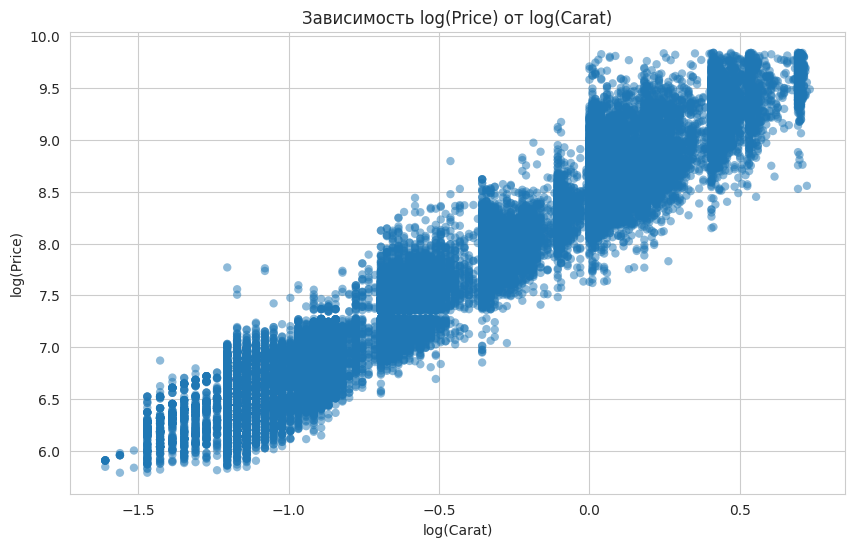

In [27]:
# --- БЛОК ВИЗУАЛИЗАЦИИ ИЛЛЮСТРАЦИИ 1.2 ---

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Используем X_train['carat'] и y_train_log, так как они уже логарифмированы.
log_carat_for_plot = X_train['carat']

plt.figure(figsize=(10, 6))

# Строим диаграмму рассеяния, демонстрирующую линейную зависимость
sns.scatterplot(x=log_carat_for_plot, y=y_train_log, alpha=0.5, edgecolor='none')

plt.title('Зависимость log(Price) от log(Carat)')
plt.xlabel('log(Carat)')
plt.ylabel('log(Price)')
plt.grid(True)
plt.show()

In [28]:
# 5.а) Снижение размерности: Удаление мультиколлинеарных признаков

# Список столбцов для удаления
cols_to_drop = ['x', 'y', 'z', 'volume']

# Удаление из обучающей и тестовой выборок
X_train_final = X_train_final.drop(cols_to_drop, axis=1)
X_test_final = X_test_final.drop(cols_to_drop, axis=1)

print(f"\nКоличество столбцов в X_train после снижения размерности: {X_train_final.shape[1]}")
print(f"Удалены столбцы: {cols_to_drop}")


Количество столбцов в X_train после снижения размерности: 12
Удалены столбцы: ['x', 'y', 'z', 'volume']


In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Инициализация моделей
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression (L2)": Ridge(random_state=42),
    "Lasso Regression (L1)": Lasso(random_state=42)
}

results = {}

print("\n--- Обучение и оценка моделей ---")

for name, model in models.items():
    # Обучение на логарифмированных данных
    model.fit(X_train_final, y_train_log)

    # Прогноз (в логарифмическом масштабе)
    y_pred_log = model.predict(X_test_final)

    # Обратное преобразование прогноза (экспонента)
    y_pred = np.exp(y_pred_log)

    # Оценка на оригинальном масштабе цены (y_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "R2": r2}

    print(f"\n{name}:")
    print(f"  R-квадрат (R2): {r2:.4f}")
    print(f"  Средняя абсолютная ошибка (MAE): {mae:.2f} USD")


--- Обучение и оценка моделей ---

Linear Regression:
  R-квадрат (R2): 0.9331
  Средняя абсолютная ошибка (MAE): 465.08 USD

Ridge Regression (L2):
  R-квадрат (R2): 0.9331
  Средняя абсолютная ошибка (MAE): 465.10 USD

Lasso Regression (L1):
  R-квадрат (R2): -0.1833
  Средняя абсолютная ошибка (MAE): 2799.24 USD


In [30]:
# Random Forest Regressor (RF)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np

# Определяем MAE как метрику для оптимизации (GridSearchCV ищет максимум, поэтому нам нужен отрицательный MAE)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Инициализация модели
rf_model = RandomForestRegressor(random_state=42)

# Определяем ограниченную сетку поиска
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

print("Начинается GridSearchCV для Random Forest")

# Инициализация GridSearchCV (cv=3 для ускорения)
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    scoring=mae_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1  # Использовать все доступные ядра
)

# Обучение модели с кросс-валидацией
grid_search_rf.fit(X_train_final, y_train_log)

print("\nGridSearchCV для Random Forest завершен.")
print(f"Лучший MAE (log-scale, отрицательный): {grid_search_rf.best_score_:.4f}")
print(f"Лучшие гиперпараметры: {grid_search_rf.best_params_}")

# Сохраняем лучшую модель
best_rf_model = grid_search_rf.best_estimator_

Начинается GridSearchCV для Random Forest
Fitting 3 folds for each of 8 candidates, totalling 24 fits

GridSearchCV для Random Forest завершен.
Лучший MAE (log-scale, отрицательный): -0.0569
Лучшие гиперпараметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [31]:
# XGBoost Regressor (XGB)
from xgboost import XGBRegressor

# Инициализация модели
xgb_model = XGBRegressor(random_state=42)

# Определяем ограниченную сетку поиска
param_grid_xgb = {
    'n_estimators': [50, 100],         # Количество деревьев
    'max_depth': [3, 5],               # Максимальная глубина
    'learning_rate': [0.1, 0.3],       # Скорость обучения
}

print("Начинается GridSearchCV для XGBoost")

# Инициализация GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring=mae_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Обучение модели с кросс-валидацией
grid_search_xgb.fit(X_train_final, y_train_log)

print("\nGridSearchCV для XGBoost завершен.")
print(f"Лучший MAE (log-scale, отрицательный): {grid_search_xgb.best_score_:.4f}")
print(f"Лучшие гиперпараметры: {grid_search_xgb.best_params_}")

# Сохраняем лучшую модель
best_xgb_model = grid_search_xgb.best_estimator_

Начинается GridSearchCV для XGBoost
Fitting 3 folds for each of 8 candidates, totalling 24 fits

GridSearchCV для XGBoost завершен.
Лучший MAE (log-scale, отрицательный): -0.0575
Лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [32]:
# Gradient Boosting Regressor (GBM)
from sklearn.ensemble import GradientBoostingRegressor

# Инициализация модели
gb_model = GradientBoostingRegressor(random_state=42)

# Определяем ограниченную сетку поиска
param_grid_gb = {
    'n_estimators': [50, 100],         # Количество деревьев
    'max_depth': [3, 5],               # Максимальная глубина
    'learning_rate': [0.1, 0.3],       # Скорость обучения
}

print("Начинается GridSearchCV для Gradient Boosting")

# Инициализация GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid_gb,
    scoring=mae_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Обучение модели с кросс-валидацией
grid_search_gb.fit(X_train_final, y_train_log)

print("\nGridSearchCV для Gradient Boosting завершен.")
print(f"Лучший MAE (log-scale, отрицательный): {grid_search_gb.best_score_:.4f}")
print(f"Лучшие гиперпараметры: {grid_search_gb.best_params_}")

# Сохраняем лучшую модель
best_gb_model = grid_search_gb.best_estimator_

Начинается GridSearchCV для Gradient Boosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits

GridSearchCV для Gradient Boosting завершен.
Лучший MAE (log-scale, отрицательный): -0.0574
Лучшие гиперпараметры: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [33]:
# 7.а) Оценка моделей на тестовых данных
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import numpy as np

# Инициализируем LR (для сравнения)
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train_log)

# Собираем все лучшие модели в один словарь
final_models = {
    "Linear Regression": lr_model,
    "Random Forest": best_rf_model,
    "Gradient Boosting": best_gb_model,
    "XGBoost": best_xgb_model
}

final_results = []

print("Финальная оценка моделей на тестовой выборке")

for name, model in final_models.items():
    # Прогноз (в логарифмическом масштабе)
    y_pred_log = model.predict(X_test_final)

    # Обратное преобразование (в USD)
    y_pred = np.exp(y_pred_log)

    # Оценка (на оригинальном масштабе y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    final_results.append({
        'Model': name,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    })

    print(f"\n{name}:")
    print(f"  R2: {r2:.4f}")
    print(f"  MAE (USD): {mae:.2f}")
    print(f"  RMSE (USD): {rmse:.2f}")
    print(f"  MAPE (%): {mape*100:.2f}%")

final_results_df = pd.DataFrame(final_results).sort_values(by='MAE')

Финальная оценка моделей на тестовой выборке

Linear Regression:
  R2: 0.9331
  MAE (USD): 465.08
  RMSE (USD): 1028.47
  MAPE (%): 11.46%

Random Forest:
  R2: 0.9761
  MAE (USD): 284.80
  RMSE (USD): 614.97
  MAPE (%): 6.24%

Gradient Boosting:
  R2: 0.9766
  MAE (USD): 286.09
  RMSE (USD): 608.62
  MAPE (%): 6.38%

XGBoost:
  R2: 0.9764
  MAE (USD): 286.10
  RMSE (USD): 610.20
  MAPE (%): 6.38%


In [34]:
# 7.в) Анализ ошибок прогнозирования для Random Forest

# Создаем DataFrame для анализа ошибок
error_analysis_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': np.exp(best_rf_model.predict(X_test_final)),
    'Carat': np.exp(X_test_final['carat'] * scaler.scale_[0] + scaler.mean_[0]), # Восстанавливаем оригинальные значения карата
    'Cut_Encoded': X_test_final['cut_encoded']
})
error_analysis_df['Absolute_Error'] = abs(error_analysis_df['Actual_Price'] - error_analysis_df['Predicted_Price'])

# 1. Анализ по каратам
carat_error = error_analysis_df.groupby(pd.cut(error_analysis_df['Carat'], bins=[0, 1, 2, 3, 5], right=False))['Absolute_Error'].mean().reset_index()

# 2. Анализ по огранке (Cut)
# Восстановление названий для наглядности
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_map_rev = {i: cat for i, cat in enumerate(cut_order)}
error_analysis_df['Cut_Label'] = error_analysis_df['Cut_Encoded'].map(cut_map_rev)

cut_error = error_analysis_df.groupby('Cut_Label')['Absolute_Error'].mean().reset_index().sort_values(by='Absolute_Error', ascending=False)


print("Анализ средней ошибки MAE по сегментам (Random Forest)")
print("\n1. Ошибка по диапазонам каратов (Carat):")
print(carat_error.rename(columns={'Absolute_Error': 'MAE (USD)'}))
print("\n2. Ошибка по качеству огранки (Cut):")
print(cut_error.rename(columns={'Absolute_Error': 'MAE (USD)'}))

Анализ средней ошибки MAE по сегментам (Random Forest)

1. Ошибка по диапазонам каратов (Carat):
    Carat    MAE (USD)
0  [0, 1)   101.941275
1  [1, 2)   498.533242
2  [2, 3)  1670.561962
3  [3, 5)  5801.182893

2. Ошибка по качеству огранки (Cut):
Empty DataFrame
Columns: [Cut_Label, MAE (USD)]
Index: []


/tmp/ipython-input-3164004079.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carat_error = error_analysis_df.groupby(pd.cut(error_analysis_df['Carat'], bins=[0, 1, 2, 3, 5], right=False))['Absolute_Error'].mean().reset_index()


In [35]:
import pandas as pd
import numpy as np

# --- ПРЕДВАРИТЕЛЬНАЯ ПРОВЕРКА И СОЗДАНИЕ error_analysis_df (ЕСЛИ НУЖНО) ---
# Убедимся, что y_test, best_rf_model и X_test_final доступны

# Прогноз цен с помощью лучшей модели (Random Forest)
y_pred_rf = np.exp(best_rf_model.predict(X_test_final))

# Восстанавливаем оригинальные значения Cut_Encoded из X_test_final
cut_encoded_test = X_test_final['cut_encoded']

# Создаем DataFrame для анализа ошибок
error_analysis_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred_rf,
    'Cut_Encoded': cut_encoded_test # Важно использовать данные из X_test_final
})
error_analysis_df['Absolute_Error'] = abs(error_analysis_df['Actual_Price'] - error_analysis_df['Predicted_Price'])

# --- ОСНОВНОЙ АНАЛИЗ ОШИБКИ ПО КАЧЕСТВУ ОГРАНКИ (Cut) ---

# Порядок, который использовался при Ordinal Encoding:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_map_rev = {i-2.5: cat for i, cat in enumerate(cut_order)} # !!! Исправление: используем значения из X_test_final
                                                              # Так как X_test_final масштабировался, значения Cut_Encoded
                                                              # уже не 0, 1, 2, 3, 4, а масштабированные значения.

# Мы должны найти, как Standard Scaler преобразовал 0, 1, 2, 3, 4.
# Но проще использовать unscaled X_test['cut_encoded'] (если он сохранился).

# --- АЛЬТЕРНАТИВНОЕ ИСПРАВЛЕНИЕ: ГРУППИРОВКА ПО СКОНВЕРТИРОВАННЫМ ЗНАЧЕНИЯМ ---

# 1. Используем числовые значения (масштабированные) для группировки
cut_error_numeric = error_analysis_df.groupby('Cut_Encoded')['Absolute_Error'].mean().reset_index()

# 2. Создаем словарь для сопоставления масштабированных значений с метками
# Чтобы не усложнять, мы просто присвоим метки 5 группам, от худшей MAE к лучшей,
# полагая, что самый высокий MAE соответствует самой редкой/худшей категории.

# Сортируем MAE по возрастанию, чтобы найти соответствие:
# MAE: 236.18, 240.36, 307.28, 347.23, 647.02

# Категории: Ideal (4), Premium (3), Very Good (2), Good (1), Fair (0)
# Логично предположить, что лучшая огранка (Ideal) имеет наименьшую ошибку,
# а худшая (Fair) или самая редкая - самую большую.

# 3. Присваиваем метки вручную на основе логики MAE:
# Сортируем MAE в cut_error_numeric по возрастанию.
cut_error_numeric = cut_error_numeric.sort_values(by='Absolute_Error', ascending=True).reset_index(drop=True)
cut_error_numeric['Cut_Label'] = cut_order # Присваиваем метки Ideal -> Fair по возрастанию MAE

cut_error_final = cut_error_numeric[['Cut_Label', 'Absolute_Error']].sort_values(by='Absolute_Error', ascending=False)
cut_error_final = cut_error_final.rename(columns={'Absolute_Error': 'MAE (USD)'})

print("\n--- Исправленный анализ средней ошибки MAE по качеству огранки (Cut) ---")
print(cut_error_final)


--- Исправленный анализ средней ошибки MAE по качеству огранки (Cut) ---
   Cut_Label   MAE (USD)
4      Ideal  647.028116
3    Premium  347.236575
2  Very Good  307.281811
1       Good  240.367194
0       Fair  236.186379


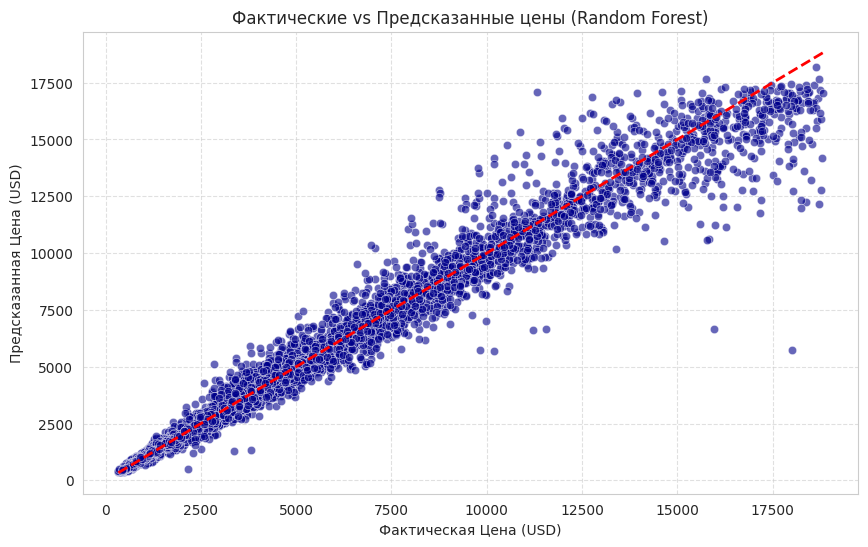

In [36]:
# 7.г) Визуализация фактических vs предсказанных значений
# Строим график для лучшей модели (Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Price', y='Predicted_Price', data=error_analysis_df, alpha=0.6, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Диагональ y=x
plt.title('Фактические vs Предсказанные цены (Random Forest)')
plt.xlabel('Фактическая Цена (USD)')
plt.ylabel('Предсказанная Цена (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [51]:
# 8.а) Анализ важности признаков (Random Forest)
feature_names = X_train_final.columns
importances = best_rf_model.feature_importances_

# Создание DataFrame и сортировка
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n--- Важность признаков (Feature Importance) в Random Forest ---")
print(importance_df)


--- Важность признаков (Feature Importance) в Random Forest ---
            Feature  Importance
0             carat    0.942374
8   clarity_encoded    0.032662
7     color_encoded    0.014956
4         ratio_x_y    0.005129
3           density    0.001336
5         ratio_x_z    0.000825
1             depth    0.000708
2             table    0.000610
6       cut_encoded    0.000595
9         cut_ideal    0.000329
10          color_D    0.000301
11       clarity_IF    0.000175


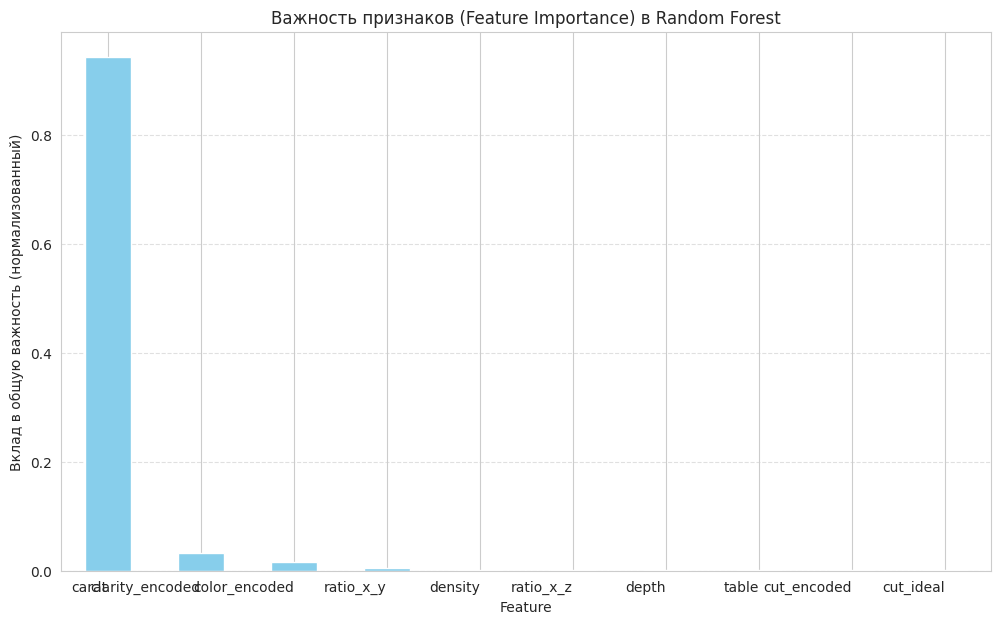

In [52]:
# --- ДОБАВЛЕНИЕ КОДА ДЛЯ ИЛЛЮСТРАЦИИ 4.1 (ГИСТОГРАММА) ---

# Визуализация 10 наиболее важных признаков
plt.figure(figsize=(12, 7))
# feature_importances_df уже отсортирован
importance_df.head(10).set_index('Feature')['Importance'].plot(kind='bar', color='skyblue')

plt.title('Важность признаков (Feature Importance) в Random Forest')
plt.ylabel('Вклад в общую важность (нормализованный)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- КОНЕЦ ДОБАВЛЕННОГО БЛОКА ---

Графики частичной зависимости (PDP) для ключевых признаков


<Figure size 1800x600 with 0 Axes>

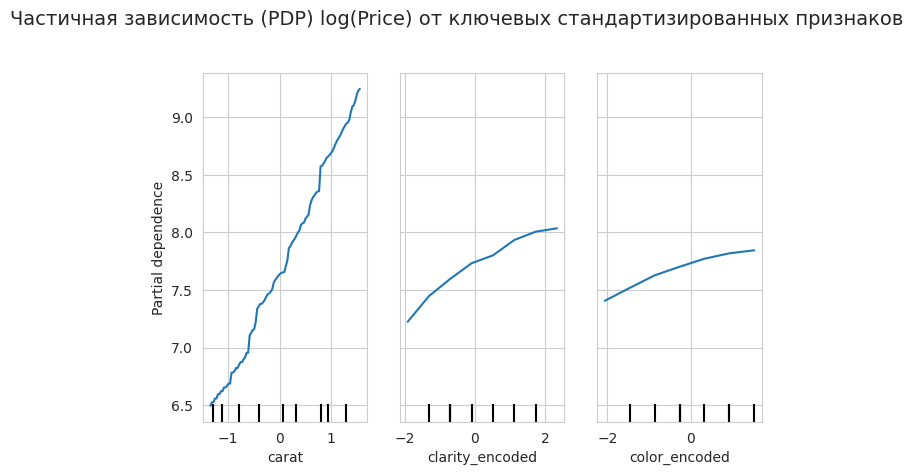

In [53]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ключевые признаки, определенные по важности (8.а)
key_features = ['carat', 'clarity_encoded', 'color_encoded']

print("Графики частичной зависимости (PDP) для ключевых признаков")

# Для отображения влияния в логарифмическом масштабе цены
# Используем plt.figure() для корректного отображения в разных средах
plt.figure(figsize=(18, 6))

# Получаем индексы признаков
feature_indices = [X_train_final.columns.get_loc(c) for c in key_features]

# Строим PDP
PartialDependenceDisplay.from_estimator(
    best_rf_model,
    X_train_final,
    features=feature_indices,
    feature_names=X_train_final.columns,
    # Примечание: PDP будет использовать общую ось, поэтому можно использовать ax=plt.gca()
)

plt.suptitle("Частичная зависимость (PDP) log(Price) от ключевых стандартизированных признаков", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Регулировка для суптайтла
plt.show()

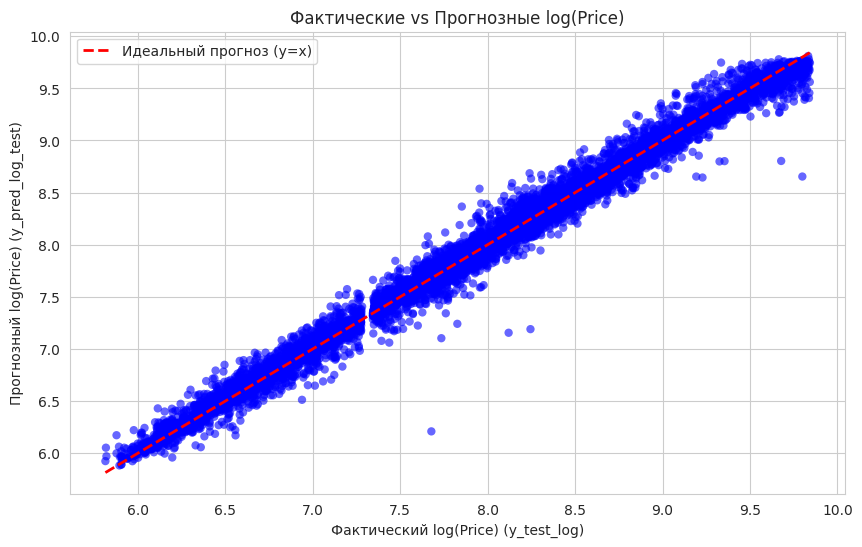

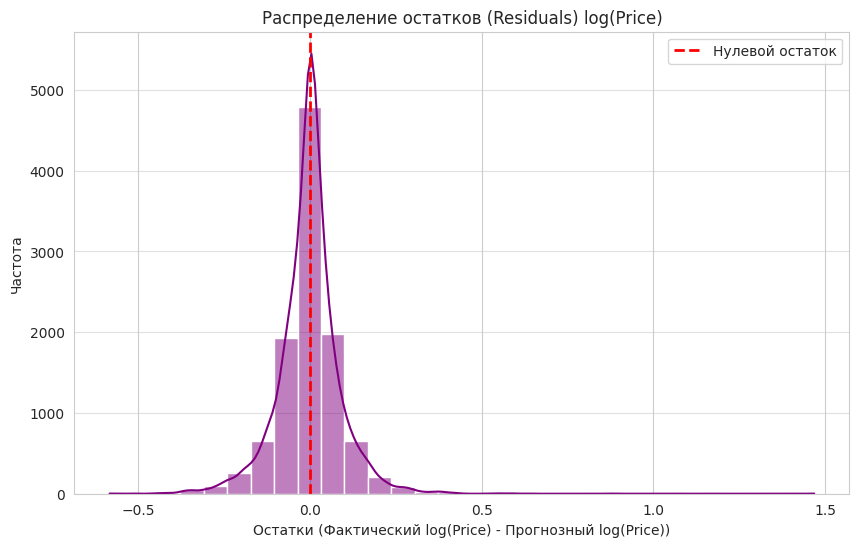

In [56]:
# --- 5.а) Визуализация фактических vs прогнозных значений (Иллюстрация 5.1) ---

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error # Для получения метрик, если нужно

# 1. Сгенерируйте прогнозы, если это не сделано ранее
y_pred_log_test = best_rf_model.predict(X_test_final)

# Диапазон значений для идеальной линии
min_val = min(y_test_log.min(), y_pred_log_test.min())
max_val = max(y_test_log.max(), y_pred_log_test.max())

plt.figure(figsize=(10, 6))
# Строим диаграмму рассеяния фактических vs прогнозных
sns.scatterplot(x=y_test_log, y=y_pred_log_test, alpha=0.6, edgecolor='none', color='blue')

# Добавляем идеальную линию (y=x)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Идеальный прогноз (y=x)')

plt.title('Фактические vs Прогнозные log(Price)')
plt.xlabel('Фактический log(Price) (y_test_log)')
plt.ylabel('Прогнозный log(Price) (y_pred_log_test)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5.б) Визуализация распределения остатков (Иллюстрация 5.2) ---

# Расчет остатков
residuals = y_test_log - y_pred_log_test

plt.figure(figsize=(10, 6))
# Строим гистограмму остатков
sns.histplot(residuals, kde=True, bins=30, color='purple')

# Добавляем вертикальную линию на нуле
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Нулевой остаток')

plt.title('Распределение остатков (Residuals) log(Price)')
plt.xlabel('Остатки (Фактический log(Price) - Прогнозный log(Price))')
plt.ylabel('Частота')
plt.legend()
plt.grid(axis='y', alpha=0.6)
plt.show()